<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Generating_Multivariate_Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:38:55 Starting...
14:38:55 Installing yfinance into Google notebook...
14:39:02 Installing arch into Google notebook...
14:39:14 Initialized.


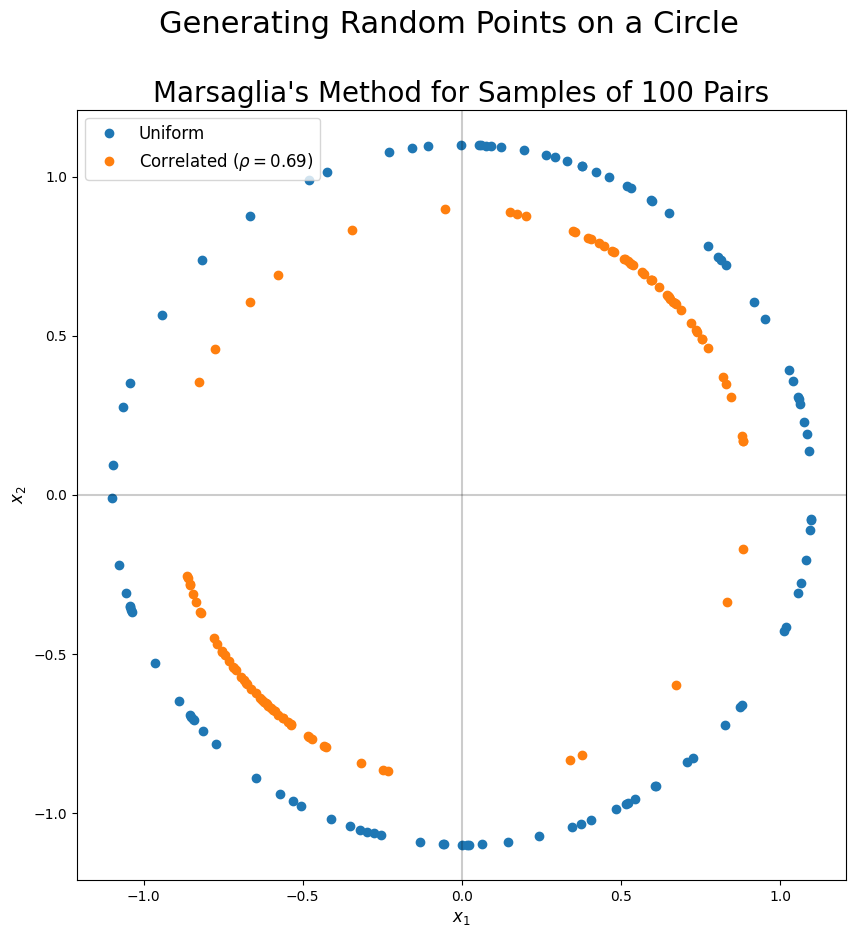

In [94]:
from scipy.stats import multivariate_normal

def gkmatrix(n=2,rho=zero,sigma=one):
    """Return a Grinold-Kahn structure covariance matrix."""

    if isinstance(n,int) and n>0:
        mat=np.zeros((n,n))

        for i in range(n):
            for j in range(n):
                mat[i,j]=one if i==j else rho

        return mat*sigma**2

    else:
        raise ValueError("n must be an integer greater than 0. %s was supplied." % repr(n))

def marsaglia(n=1,sigma=gkmatrix(2)):
    """Return random points on a (N-1)-sphere using Marsaglia's method. N is the dimension of sigma."""

    sample=multivariate_normal.rvs(mean=[zero]*sigma.shape[0],cov=sigma,size=n)
    return sample/np.linalg.norm(sample,axis=1)[:,None]

figure,plot=pl.subplots(figsize=(ten,ten))

# uniform
x,y=tuple(marsaglia(n:=100).T*1.1)
plot.plot(x,y,'o',label='Uniform')

# correlated
x,y=tuple(m:=marsaglia(100,gkmatrix(2,rho:=0.9)).T*0.9)
plot.plot(x,y,'o',label='Correlated ($\\rho = %.2f$)' % np.corrcoef(m)[0,1])

plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.legend(fontsize=12)
figure.suptitle(title:='Generating Random Points on a Circle',fontsize=22)
plot.set_xlabel('$x_1$',fontsize=12)
plot.set_ylabel('$x_2$',fontsize=12)
plot.set_title(subtitle:="Marsaglia's Method for Samples of {:,d} Pairs".format(n),fontsize=20)
plot.set_aspect('equal')
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

19:51:53
Sample Correlation Matrices:
[[ 1.         -0.00147838 -0.00318426]
 [-0.00147838  1.          0.01625768]
 [-0.00318426  0.01625768  1.        ]]
[[1.         0.66740673 0.65211067]
 [0.66740673 1.         0.6336224 ]
 [0.65211067 0.6336224  1.        ]]


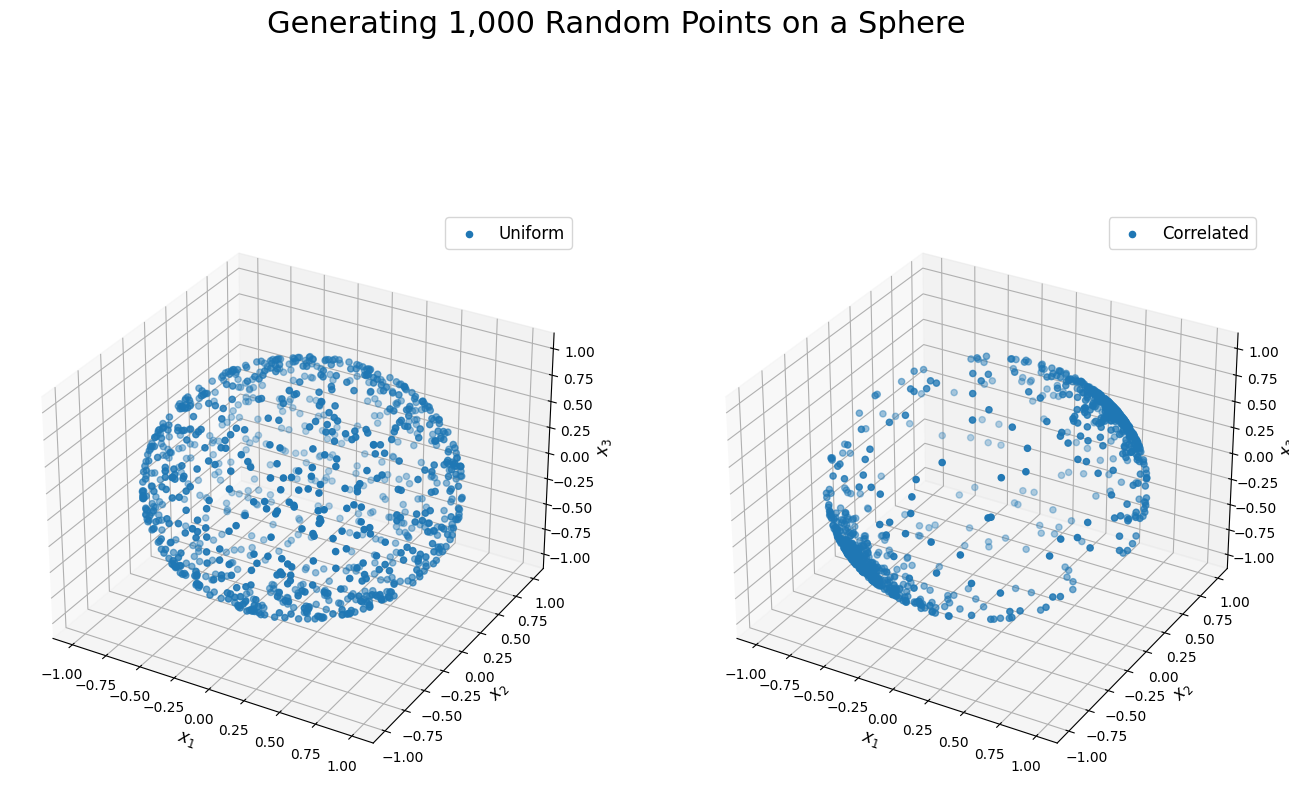

In [95]:
figure,plots=pl.subplots(1,2,subplot_kw={'projection':'3d'},figsize=(ten*GoldenRatio,ten))
plots[0].scatter(*tuple(u:=marsaglia(n:=1000,gkmatrix(3)).T),label='Uniform')
plots[1].scatter(*tuple(c:=marsaglia(n,gkmatrix(3,rho)).T),label='Correlated')
nprint("Sample Correlation Matrices:",np.corrcoef(u),np.corrcoef(c),sep="\n")

for plot in plots:
    plot.set_xlabel('$x_1$',fontsize=12)
    plot.set_ylabel('$x_2$',fontsize=12)
    plot.set_zlabel('$x_3$',fontsize=12)
    plot.legend(fontsize=12)

figure.suptitle(title:='Generating {:,d} Random Points on a Sphere'.format(n),fontsize=22)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

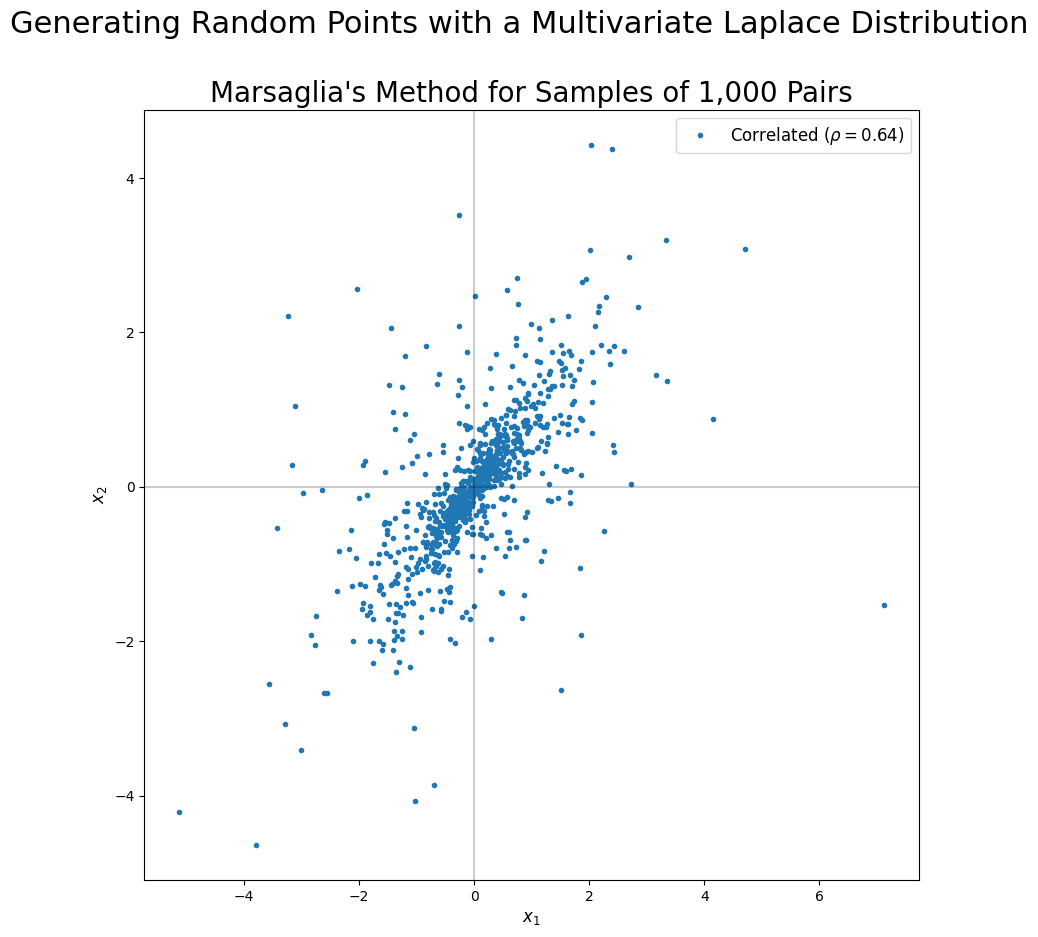

In [85]:
from scipy.stats import expon

def mvlaplace(n=1,rho=gkmatrix(2),sigma=one):
    """Generate Multivariate Laplace coordinates with a given covariance matrix."""

    sample=marsaglia(n,rho)
    return sample*expon.rvs(scale=sigma,size=n)[:,None]

figure,plot=pl.subplots(figsize=(ten,ten))

# 2-Laplace
x,y=tuple(l:=mvlaplace(n:=1000,gkmatrix(2,rho)).T)
plot.plot(x,y,'.',label='Correlated ($\\rho = %.2f$)' % np.corrcoef(l)[0,1])
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.legend(fontsize=12)
figure.suptitle(title:='Generating Random Points with a Multivariate Laplace Distribution',fontsize=22)
plot.set_xlabel('$x_1$',fontsize=12)
plot.set_ylabel('$x_2$',fontsize=12)
plot.set_title(subtitle:="Marsaglia's Method for Samples of {:,d} Pairs".format(n),fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

16:06:03
Sample Correlation Matrix:
[[1.         0.62949893 0.5888635 ]
 [0.62949893 1.         0.64861369]
 [0.5888635  0.64861369 1.        ]]


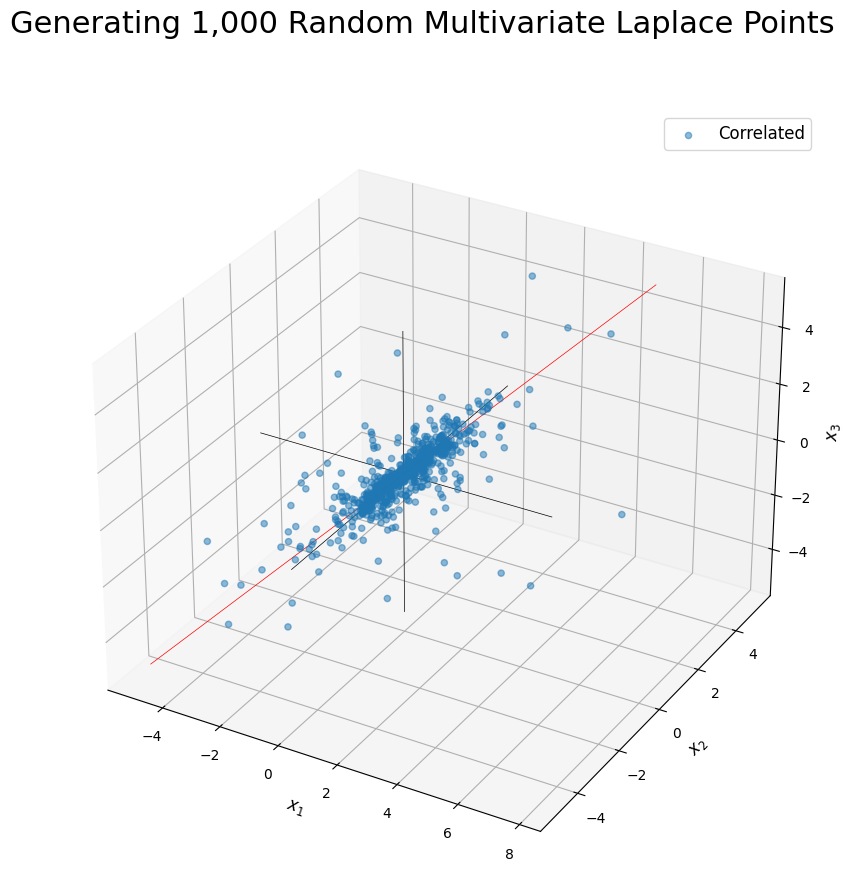

In [86]:
figure,plot=pl.subplots(subplot_kw={'projection':'3d'},figsize=(ten,ten))
plot.scatter(*tuple(c:=mvlaplace(n,gkmatrix(3,rho)).T),label='Correlated',alpha=0.5)
nprint("Sample Correlation Matrix:",np.corrcoef(c),sep="\n")
plot.set_xlabel('$x_1$',fontsize=12)
plot.set_ylabel('$x_2$',fontsize=12)
plot.set_zlabel('$x_3$',fontsize=12)
plot.plot(x:=np.array([five,-five]),x,x,color='red',linewidth=half)
plot.plot(x,x*zero,x*zero,color='black',linewidth=half)
plot.plot(x*zero,x,x*zero,color='black',linewidth=half)
plot.plot(x*zero,x*zero,x,color='black',linewidth=half)
plot.legend(fontsize=12)
figure.suptitle(title:='Generating {:,d} Random Multivariate Laplace Points'.format(n),fontsize=22)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

In [87]:
from scipy.stats import normaltest
df=pd.DataFrame({"Log10":np.linspace(np.log10(two),four,100)}).set_index("Log10")
df["Assets"]=np.power(ten,df.index).astype(int)
df["Mean"]=df["Std.Dev."]=df["p Value"]=np.nan
df.set_index("Assets",inplace=True)
df=df[~df.index.duplicated()] # because you get a lot of 2's and 3's with this method

for i in tqdm(df.index):
    sample=mvlaplace(int(annualize),rho=gkmatrix(i,rho)).mean(axis=1)
    df.loc[i,"Mean"]=sample.mean()
    df.loc[i,"Std.Dev."]=sample.std()
    df.loc[i,"p Value"]=normaltest(sample)[1]

display(df)

,Mean,Std.Dev.,p Value
Assets,,,
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
...,...,...,...
7088,NaN,NaN,NaN
7725,NaN,NaN,NaN
8419,NaN,NaN,NaN


  0%|          | 0/89 [00:00<?, ?it/s]

,Mean,Std.Dev.,p Value
Assets,,,
2,0.026723,0.809263,3.671096e-02
3,-0.053943,0.717958,1.196246e-08
4,-0.055371,0.540986,7.420897e-06
5,0.028515,0.572964,3.461028e-34
6,0.056010,0.460836,2.562233e-07
...,...,...,...
7088,-0.000599,0.014180,7.941705e-18
7725,0.000766,0.012260,3.808431e-15
8419,-0.001240,0.011473,2.599700e-10


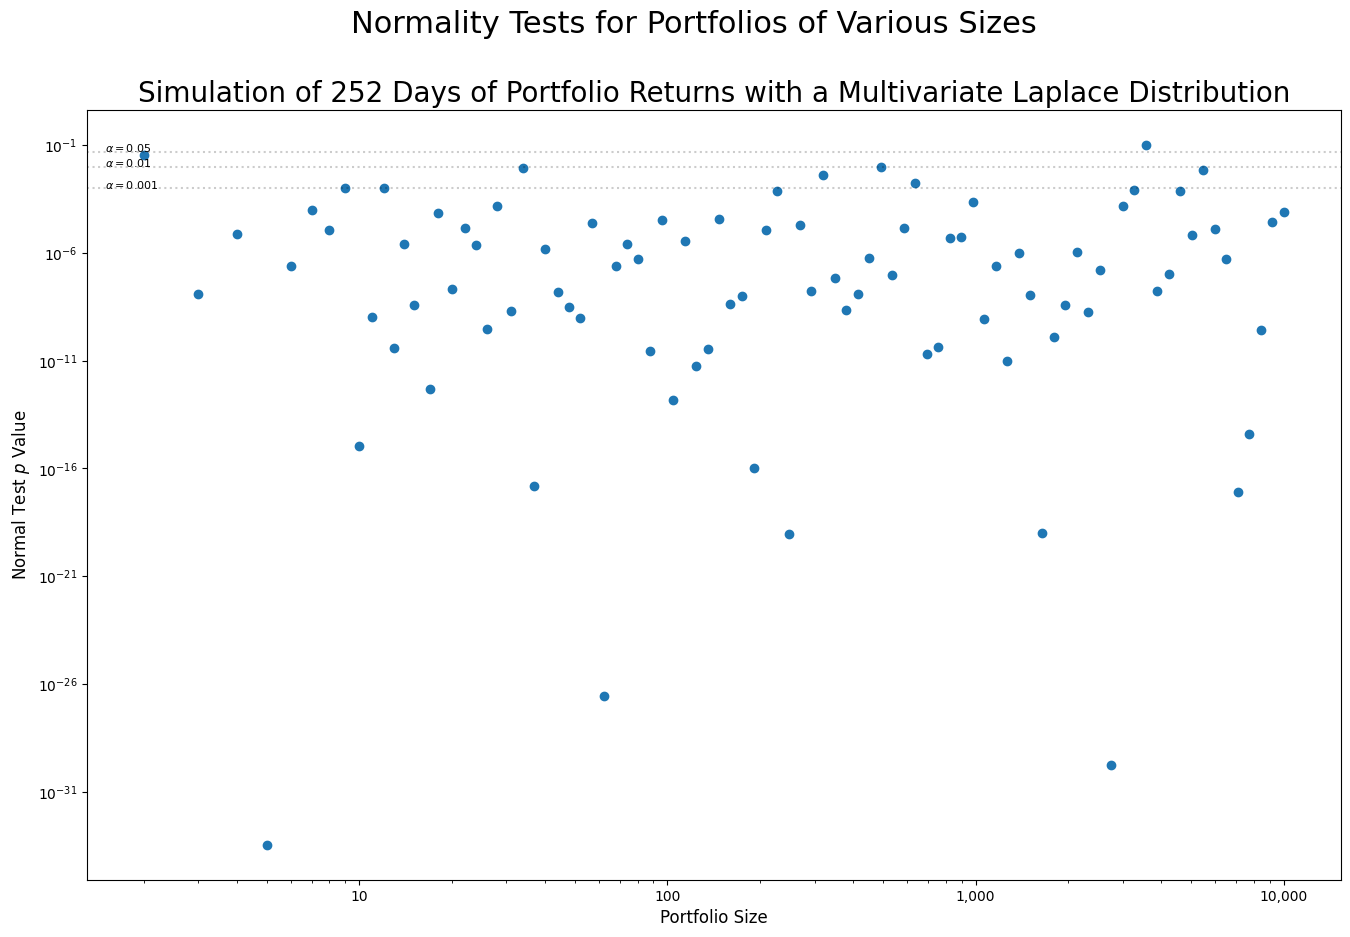

In [90]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(df.index.to_numpy(),df["p Value"].to_numpy(),'o')
plot.set_yscale('log')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))

for y in 0.05,0.01,0.001:
    plot.axhline(y,color='black',alpha=0.2,linestyle=':')
    plot.text(1.5,y,"$\\alpha = %g$" % y,fontsize=8)

plot.set_xlabel("Portfolio Size",fontsize=12)
plot.set_ylabel("Normal Test $p$ Value",fontsize=12)
figure.suptitle(title:='Normality Tests for Portfolios of Various Sizes',fontsize=22)
plot.set_title(subtitle:="Simulation of %d Days of Portfolio Returns with a Multivariate Laplace Distribution" % int(annualize),fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

## Lower Limit to Pairwise Correlation
$$
\mathbb{V}[\bar{r}]\ge0\\
\Rightarrow\;N^*=\frac{N}{1+(N-1)\rho}\ge0\\
\Rightarrow\;1+(N-1)\rho\ge0\\
\Rightarrow\;\rho\ge-\frac{1}{N-1}
$$
## Feasible and Infeasible Covariance Matrices
$$
V\in\left\{
\begin{pmatrix}\phantom{-}1&-1\\-1&\phantom{-}1\end{pmatrix},
\begin{pmatrix}
\phantom{-}1&-\frac{1}{2}&-\frac{1}{2}\\
-\frac{1}{2}&\phantom{-}1&-\frac{1}{2}\\
-\frac{1}{2}&-\frac{1}{2}&\phantom{-}1
\end{pmatrix},
\begin{pmatrix}
\phantom{-}1&-\frac{1}{3}&-\frac{1}{3}&-\frac{1}{3}\\
-\frac{1}{3}&\phantom{-}1&-\frac{1}{3}&-\frac{1}{3}\\
-\frac{1}{3}&-\frac{1}{3}&\phantom{-}1&-\frac{1}{3}\\
-\frac{1}{3}&-\frac{1}{3}&\phantom{-}1&-\frac{1}{3}\\
-\frac{1}{3}&-\frac{1}{3}&-\frac{1}{3}&\phantom{-}1\\
\end{pmatrix}
\dots
\right\}
\\
\mathrm{however}\;
V\not\in\left\{
  \begin{pmatrix}\phantom{-}1&-1&-1\\-1&\phantom{-}1&-1\\-1&-1&\phantom{-}1\end{pmatrix},
  \begin{pmatrix}\phantom{-}1&-1&-1&-1\\-1&\phantom{-}1&-1&-1\\-1&-1&\phantom{-}1&-1\\-1&-1&-1&\phantom{-}1\end{pmatrix}
\dots\right\}
$$
## Large Portfolio Limit for rho*
$$
\rho^*\le\rho\le1\;\mathrm{where}\;\rho^*=-\frac{1}{N-1}\;\mathrm{and}\;\lim_{N\rightarrow\infty}\rho^*=0
$$
## Sufficiently Normal Portfolios
$$
\mathrm{minimize}\;N\;\mathrm{where}\;\rho\approx70\%\\
\mathrm{such~that}\;\frac{N}{1+(N-1)\rho}\ge30\\
$$
## Large Portfolio Limit for N*
$$
\lim_{N\rightarrow\infty}N^*=\frac{1}{\rho}
$$

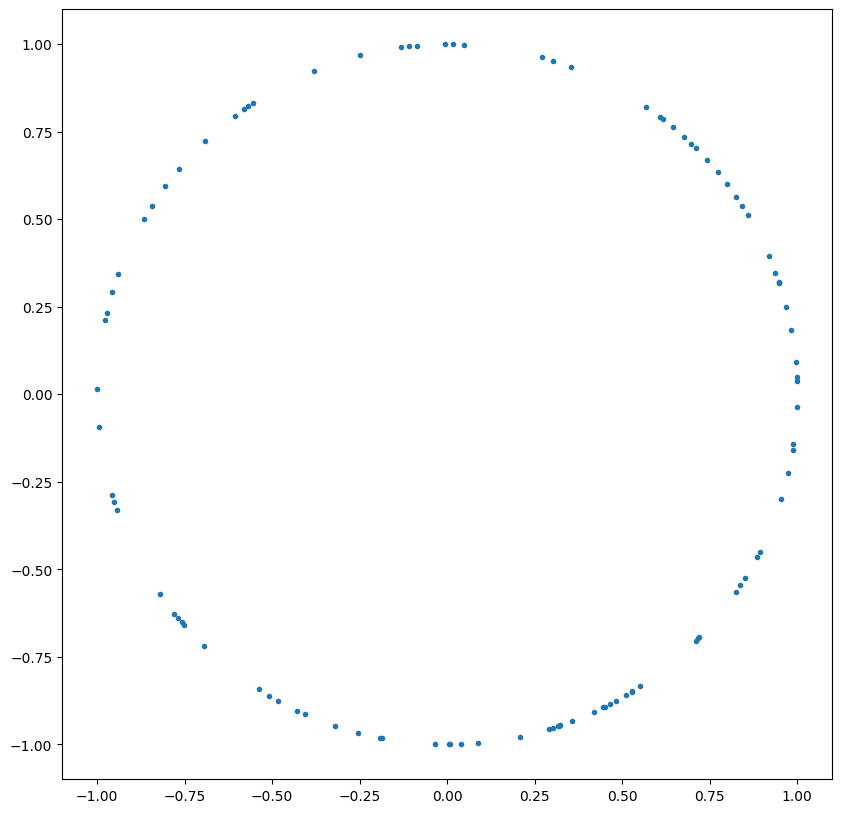

In [93]:
import numpy as np
from scipy.stats import uniform
theta=uniform(zero,two*np.pi).rvs(100)
x,y=np.cos(theta),np.sin(theta)
figure,plot=pl.subplots(figsize=(ten,ten))


(array([ 0.2764729 , -0.99957024,  0.53639953, -0.82207832, -0.0784979 ,
        -0.78866526, -0.73838626, -0.95989697, -0.52141398, -0.74093871,
         0.61028382,  0.90577127,  0.37242984, -0.99140326,  0.99156657,
         0.09249991, -0.79507301, -0.28804113, -0.11090353, -0.61052021,
        -0.92389888, -0.99951795, -0.03772636,  0.94257574,  0.63468796,
         0.344929  , -0.44449781, -0.93891802,  0.01080916,  0.50626804,
         0.99153665, -0.98098048,  0.87780049, -0.97972454, -0.68649741,
        -0.79423918, -0.76453646,  0.49867015,  0.53287025,  0.79315103,
        -0.37017138,  0.99907617, -0.52795994,  0.76265906,  0.91001481,
        -0.89316024,  0.74687328, -0.69999643,  0.62418461, -0.83784764,
        -0.03317481,  0.69233546,  0.95602533,  0.87086047,  0.79885868,
         0.06076253, -0.67992854,  0.42406445,  0.82571161,  0.13155624,
         0.86500942,  0.9452281 ,  0.99077837, -0.18884782, -0.85879931,
        -0.86046217,  0.41446848, -0.89062713,  0.6